In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [4]:
df=pd.read_csv("/content/water_potability.csv")
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


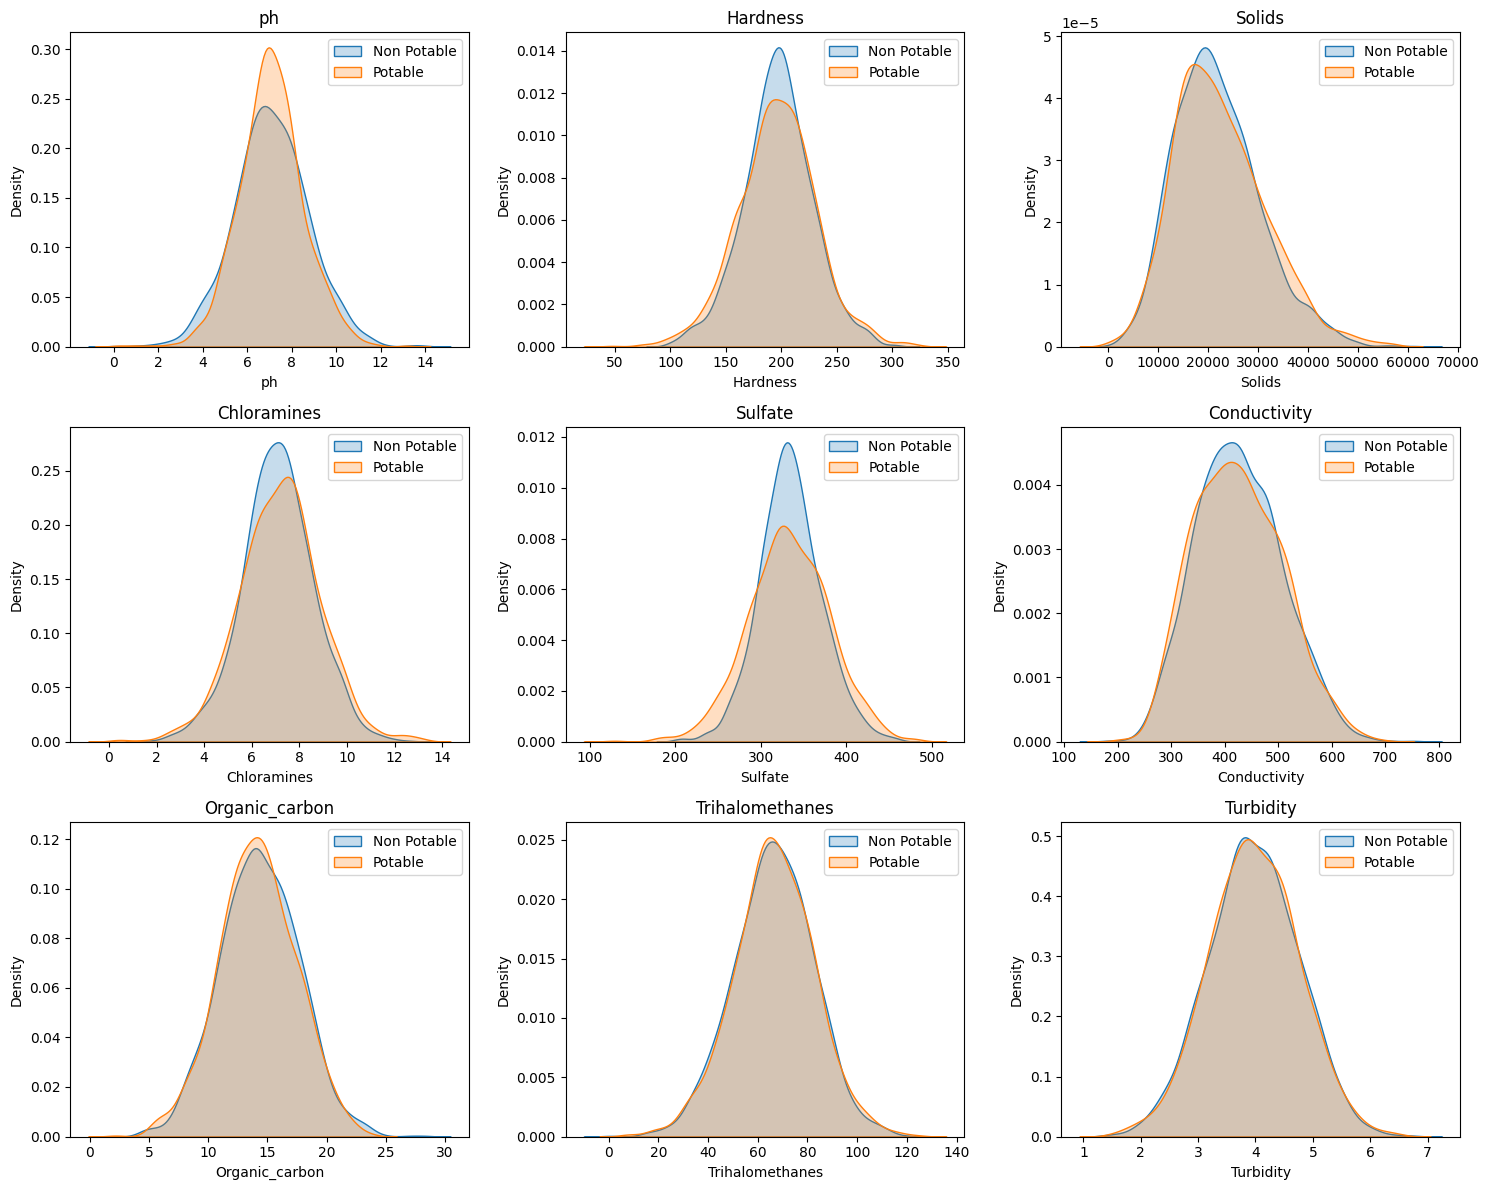

In [5]:
non_potable = df.query("Potability == 0")
potable = df.query("Potability == 1")

plt.figure(figsize=(15, 12))

for i, col in enumerate(df.columns[:9]):
    plt.subplot(3, 3, i + 1)
    sns.kdeplot(x=non_potable[col], label="Non Potable", fill=True)
    sns.kdeplot(x=potable[col], label="Potable", fill=True)
    plt.title(col)
    plt.legend()

plt.tight_layout()
plt.show()


Features like ph, hardness, chloramines, sulphate affect potability of water more than other features.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [7]:
df.isnull().sum()

,0
ph,491
Hardness,0
Solids,0
Chloramines,0
Sulfate,781
Conductivity,0
Organic_carbon,0
Trihalomethanes,162
Turbidity,0
Potability,0


In [8]:
df = df.fillna(df.mean())
df.isnull().sum()

,0
ph,0
Hardness,0
Solids,0
Chloramines,0
Sulfate,0
Conductivity,0
Organic_carbon,0
Trihalomethanes,0
Turbidity,0
Potability,0


In [9]:
#Separating the features and target
X = df.drop("Potability", axis=1)
Y = df["Potability"]

In [10]:
#Splitting training and testing dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=5)

In [11]:
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10, 20],
}

grid = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    cv=3,
    n_jobs=-1,
    verbose=1
)

# Train the model
grid.fit(X_train, Y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'n_estimators': [50, 100]},
             verbose=1)

In [12]:
grid.best_params_

{'max_depth': 10, 'n_estimators': 100}

In [13]:
#Checking accuracy on test data
Y_pred = grid.predict(X_test)
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.67      0.95      0.78       399
           1       0.77      0.26      0.39       257

    accuracy                           0.68       656
   macro avg       0.72      0.61      0.59       656
weighted avg       0.71      0.68      0.63       656

